In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error
import statsmodels.api as sm

In [13]:
# Load dataset
data = pd.read_csv('Drug.csv')
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [14]:
# Data Inspection
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data.describe())

(2219, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.1+ KB
None
Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64
         Effective    EaseOfUse  Satisfaction
count  2219.000000  2219.000000   2219.000000
mean      3.557972     3.958824      3.218774
std       1.113128     1.037877      1.

In [15]:
# Remove duplicates
data = data.drop_duplicates()
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361 Reviews,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [16]:
# Clean Reviews column
data['Reviews'] = pd.to_numeric(data['Reviews'].str.extract('(\d+)', expand=False), errors='coerce')
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [18]:
# Clean Information column
data['Information'] = data['Information'].str.replace(r'\r\n\t+', '', regex=True)
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Levofloxacin is used to treat a variety of bac...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,This is a generic drug. The average cash pric...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Azithromycin is an antibiotic (macrolide-type)...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42,Amoxicillin/clavulanic acid is a combination p...
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68,Levofloxacin is used to treat a variety of bac...


In [20]:
# Reset index
data.reset_index(drop=True, inplace=True)
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Levofloxacin is used to treat a variety of bac...
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,This is a generic drug. The average cash pric...
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Azithromycin is an antibiotic (macrolide-type)...
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42,Amoxicillin/clavulanic acid is a combination p...
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68,Levofloxacin is used to treat a variety of bac...


In [28]:
# Check for negative values in selected columns
col = ['Reviews','Effective','EaseOfUse','Satisfaction']
print((data[col] < 0).any().any())

False


# ================== Visualizations ==================


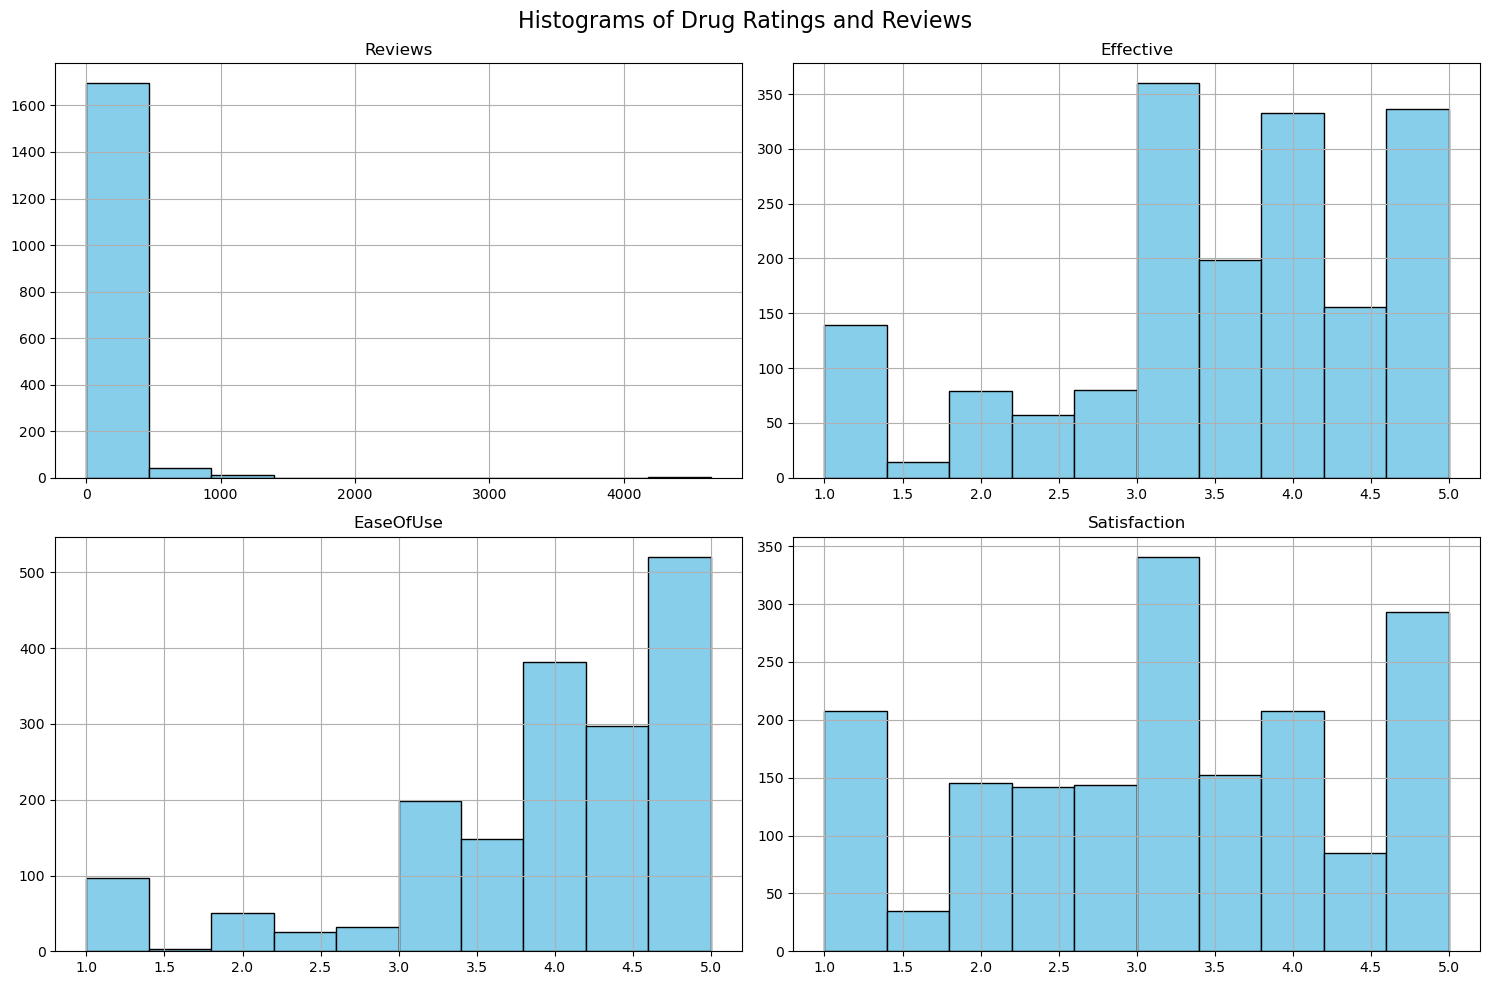

In [29]:
# Histograms for numeric features
data.hist(bins=10, figsize=(15,10), edgecolor='black', color='skyblue')
plt.suptitle("Histograms of Drug Ratings and Reviews", fontsize=16)
plt.tight_layout()
plt.show()

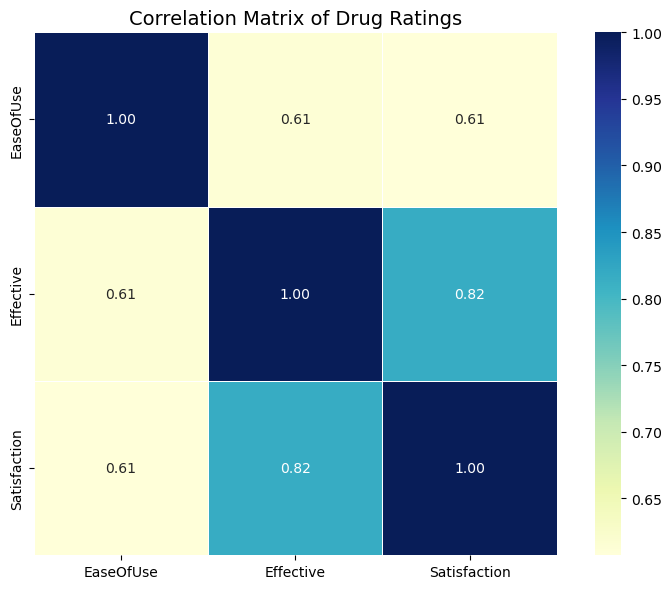

In [30]:
# Correlation matrix heatmap
plt.figure(figsize=(8,6))
cor = data[['EaseOfUse', 'Effective', 'Satisfaction']].corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Drug Ratings', fontsize=14)
plt.tight_layout()
plt.show()

) missing from current font.\Temp\ipykernel_8008\1462704232.py:9: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


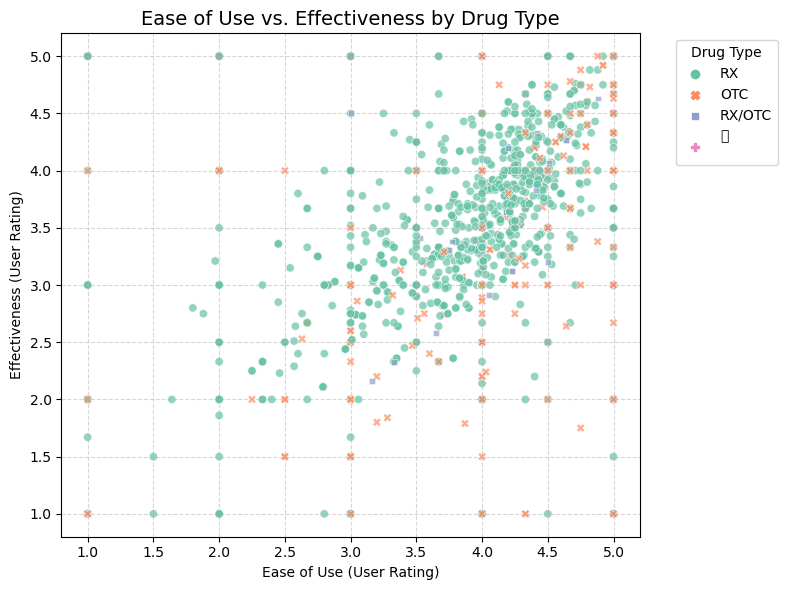

In [31]:
# Scatter Plots
plt.figure(figsize=(8,6))
sns.scatterplot(x='EaseOfUse', y='Effective', data=data, hue='Type', style='Type', palette='Set2', alpha=0.7)
plt.title('Ease of Use vs. Effectiveness by Drug Type', fontsize=14)
plt.xlabel('Ease of Use (User Rating)')
plt.ylabel('Effectiveness (User Rating)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

) missing from current font.\Temp\ipykernel_8008\2140804572.py:8: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


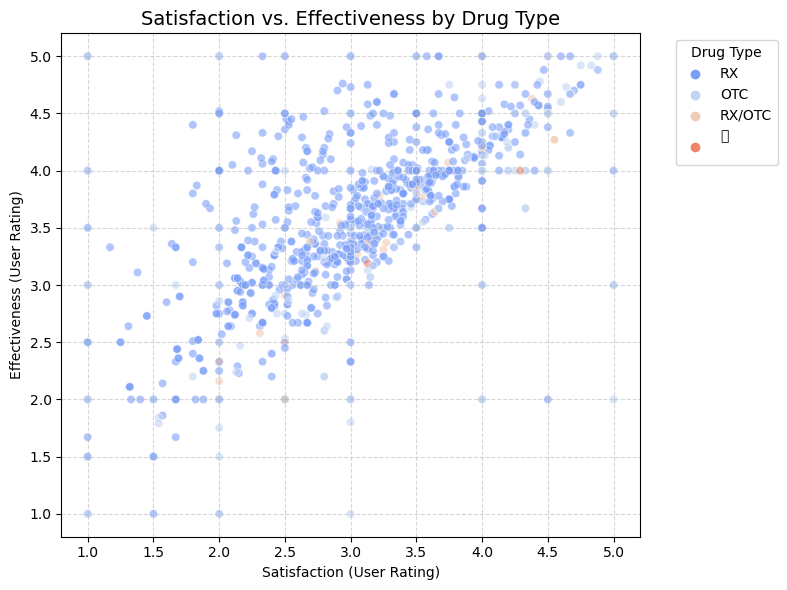

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Satisfaction', y='Effective', data=data, hue='Type', palette='coolwarm', alpha=0.6)
plt.title('Satisfaction vs. Effectiveness by Drug Type', fontsize=14)
plt.xlabel('Satisfaction (User Rating)')
plt.ylabel('Effectiveness (User Rating)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

) missing from current font.\Temp\ipykernel_8008\1437309838.py:8: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


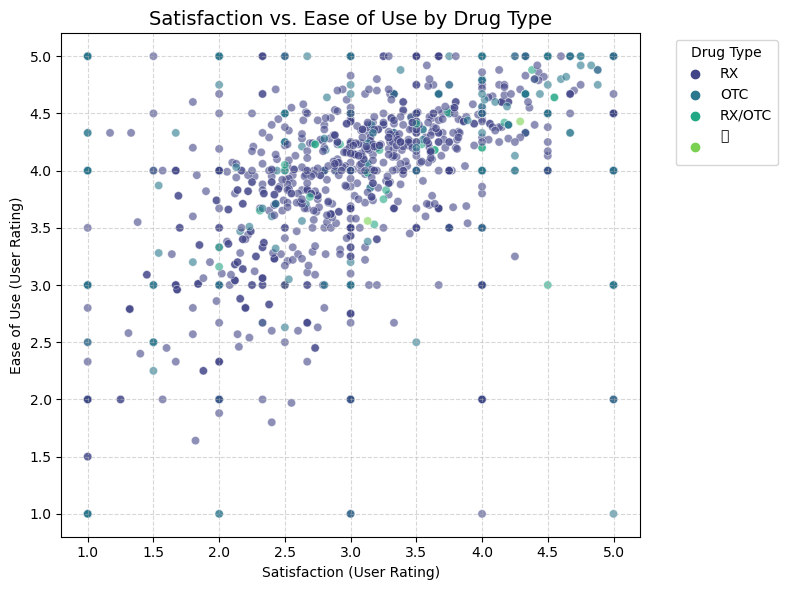

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Satisfaction', y='EaseOfUse', data=data, hue='Type', palette='viridis', alpha=0.6)
plt.title('Satisfaction vs. Ease of Use by Drug Type', fontsize=14)
plt.xlabel('Satisfaction (User Rating)')
plt.ylabel('Ease of Use (User Rating)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

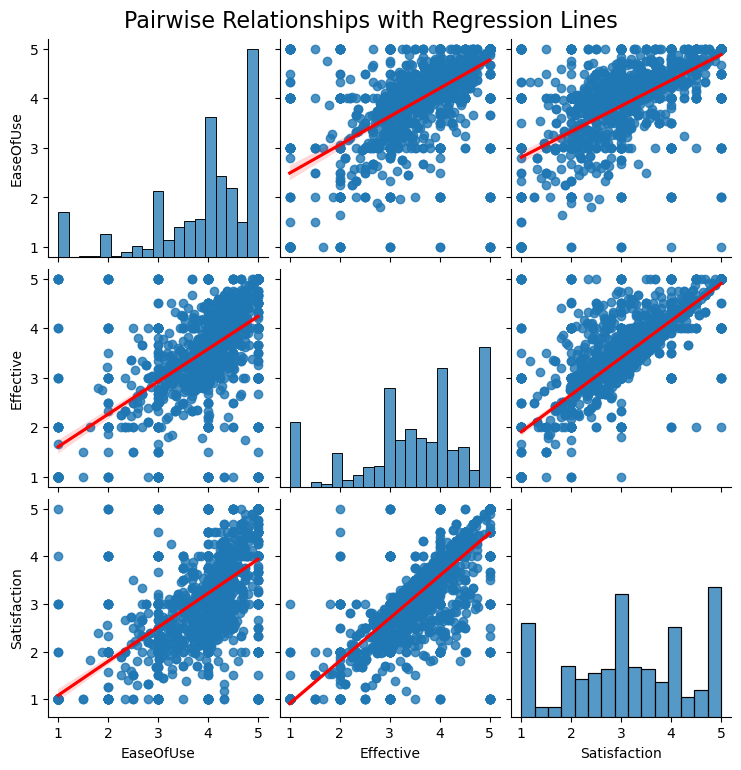

In [34]:
# Pairplot
sns.pairplot(data[['EaseOfUse', 'Effective', 'Satisfaction']], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairwise Relationships with Regression Lines', y=1.02, fontsize=16)
plt.show()


# ================== Linear Regression ==================

In [35]:
X = data[['EaseOfUse']]
y = data['Satisfaction']

In [36]:
model = LinearRegression().fit(X, y)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

Intercept: 0.3712071915189803
Slope: 0.7128565544439625


In [37]:
new_X = [[3.5]]
predicted_y = model.predict(new_X)
print('Predicted Satisfaction Level:', predicted_y[0])

Predicted Satisfaction Level: 2.866205132072849


C:\Users\ravic\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# Regression with statsmodels
X2 = sm.add_constant(data[['EaseOfUse', 'Satisfaction']])
y2 = data['Effective']
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              Effective   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1938.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        10:35:02   Log-Likelihood:                -1664.7
No. Observations:                1753   AIC:                             3335.
Df Residuals:                    1750   BIC:                             3352.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7107      0.059     12.116   

In [39]:
# ================== Model Evaluation ==================

X_train, X_test, y_train, y_test = train_test_split(data[['EaseOfUse']], data['Satisfaction'], test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.9401605111095823


# ================== Drug Recommendation on LR ==================

In [40]:
conditions = data['Condition'].unique()
recommended_drugs = {}

for condition in conditions:
    df_condition = data[data['Condition'] == condition]
    df_sorted = df_condition.sort_values(by=['Effective', 'EaseOfUse', 'Satisfaction'], ascending=False)
    top_drug = df_sorted.iloc[0]
    recommended_drugs[condition] = top_drug['Drug']

print("The top recommended drugs for each condition are:\n")
for condition, drug in recommended_drugs.items():
    print(f"{condition}: {drug}")


The top recommended drugs for each condition are:

Acute Bacterial Sinusitis: Ampicillin Sodium
adenocarcinoma of pancreas: Oxaliplatin
Atopic Dermatitis: Betamethasone Acet,Sod Phos
back pain: Acetaminophen
Bacterial Conjunctivitis: Neomycin-Polymyxin-Gramicidin
Bacterial Urinary Tract Infection: Ceftriaxone
biliary calculus: Ursodiol
chickenpox: Acyclovir Sodium
colorectal cancer: Fluorouracil
depression: Doxepin
diverticulitis of gastrointestinal tract: Ampicillin-Sulbactam
edema: Hydrochlorothiazide
endometriosis: Levonorg-Eth Estrad Triphasic
fever: Aspirin
fibromyalgia: Duloxetine
flatulence: Calcium Carbonate-Simethicone
furunculosis: Mupirocin
gastroesophageal reflux disease: Nizatidine
genital herpes simplex: Acyclovir Sodium
gout: Ketoprofen
hemorrhoids: Pramoxine-Calamine-Camphor, Pramoxine-Calamine
herpes zoster: Acyclovir Sodium
hypercholesterolemia: Evolocumab
hypertension: Nadolol
impetigo: Retapamulin
Infantile Autism: Paliperidone
Influenza: Oseltamivir
meniere's disea

# ================== Random Forest Classifier ==================


In [41]:
factorize = pd.factorize(data['Condition'])
data['Condition_Encode'] = factorize[0]

In [42]:
X = data[['Condition_Encode', 'EaseOfUse', 'Effective']]
y = data['Type']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
model = RandomForestClassifier(random_state=40, n_estimators=500, max_depth=20)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [44]:
mat = confusion_matrix(y_test, preds)
print('Confusion Matrix:\n', mat)

Confusion Matrix:
 [[  0   1   2   0]
 [  0 124  31   0]
 [  0  36 325   1]
 [  0   2   4   0]]


) missing from current font.
  plt.tight_layout()


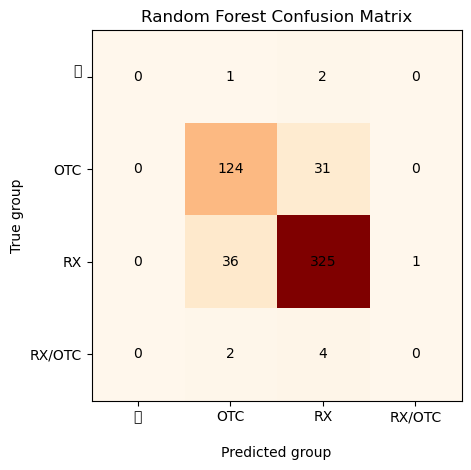

In [47]:
fig, ax = plt.subplots()
im = ax.imshow(mat, cmap='OrRd')
ax.set_xticks(np.arange(mat.shape[1]))
ax.set_yticks(np.arange(mat.shape[0]))
ax.set_xticklabels(list(np.unique(y_test)))
ax.set_yticklabels(list(np.unique(y_test)))
ax.set_xlabel("Predicted group")
ax.set_ylabel("True group")

for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
        
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()


In [48]:
acc = (mat.diagonal().sum()) / np.sum(mat)
print('Accuracy:', acc)

Accuracy: 0.8536121673003803


# ================== Predict on New Condition ==================


In [52]:
condition_input = 'colorectal cancer'
if condition_input in factorize[1].tolist():
    encoded_input = factorize[1].tolist().index(condition_input)
    predicted_type = model.predict([[encoded_input, 3.5, 4.0]])[0]
    top_drug_for_condition = recommended_drugs.get(condition_input, "No recommendation found")
    print(f"Predicted Drug Type for condition '{condition_input}': {predicted_type}")
    print(f"Recommended Drug for '{condition_input}': {top_drug_for_condition}")
else:
    print(f"Condition '{condition_input}' not found in training data.")


Predicted Drug Type for condition 'colorectal cancer': RX
Recommended Drug for 'colorectal cancer': Fluorouracil


C:\Users\ravic\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
